In [6]:
# Load
import matplotlib.pyplot as plt
import pandas as pd

raw_ohlcv = pd.read_csv("./data/ohlcv.csv", index_col=0, low_memory=False)

multi_ohlcv = raw_ohlcv.copy()

_stock_code = raw_ohlcv["stock_code"].sample(1).iloc[0]
single_ohlcv = raw_ohlcv[raw_ohlcv["stock_code"] == _stock_code].copy()
single_ohlcv.index = pd.to_datetime(single_ohlcv.index)

In [7]:
prices = single_ohlcv["close"]

In [8]:
from ta_tools.models.bollinger_band import SimpleBollingerBandModel
from ta_tools.visualizers.bollinger_band import BollingerBandVisualizer

In [9]:
BB_CFG = {
    "window": 30,
    "n": 2,
}
sbb_model = SimpleBollingerBandModel(prices, BB_CFG)

sbb_indicator = sbb_model.indicator()
sbb_signal = sbb_model.signal(sbb_indicator, continuous=True, trend=False)
sbb_signal

,price,ma_price,upper_band,lower_band,signal
date,,,,,
2019-01-21,7860,NaN,NaN,NaN,NaN
2019-01-22,7750,NaN,NaN,NaN,NaN
2019-01-23,7660,NaN,NaN,NaN,NaN
2019-01-24,7810,NaN,NaN,NaN,NaN
2019-01-25,8320,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-01-11,5720,5852.666667,6036.490670,5668.842663,0.721705
2024-01-12,5830,5854.666667,6036.058476,5673.274857,0.135986
2024-01-15,6290,5870.666667,6110.892614,5630.440719,-1.000000


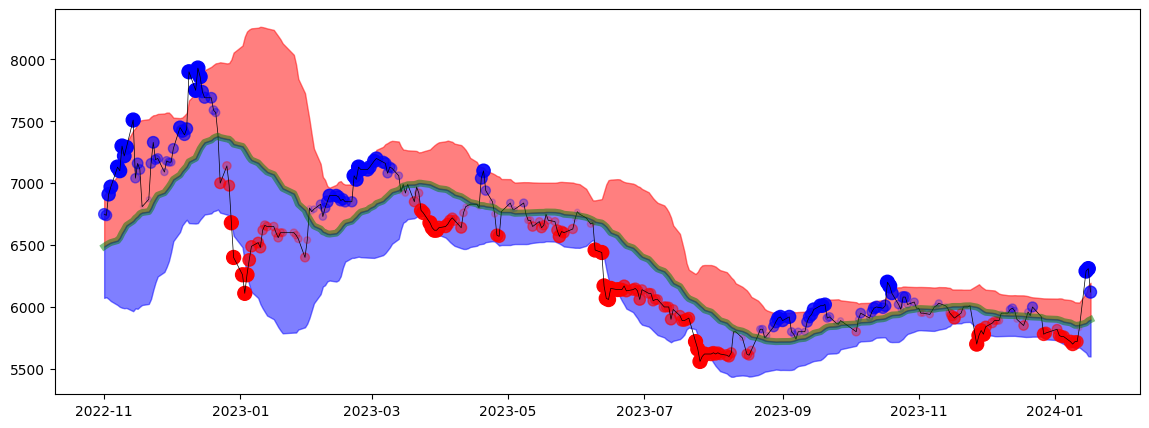

In [10]:
bb_visualizer = BollingerBandVisualizer()

recent_df = sbb_signal.tail(300)

fig = plt.figure(figsize=(14, 5))
fig = bb_visualizer.draw_price(
    fig,
    recent_df,
)
fig = bb_visualizer.draw_band(
    fig,
    recent_df,
)
fig = bb_visualizer.draw_signal(
    fig,
    recent_df,
)